In [2]:
pip install matplotlib

170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/10
313/313 [==============================] - 68s 207ms/step - loss: 1.6966 - accuracy: 0.3787 - val_loss: 1.4473 - val_accuracy: 0.4761
Epoch 2/10
313/313 [==============================] - 66s 211ms/step - loss: 1.3320 - accuracy: 0.5217 - val_loss: 1.2485 - val_accuracy: 0.5600
Epoch 3/10
313/313 [==============================] - 62s 197ms/step - loss: 1.1727 - accuracy: 0.5829 - val_loss: 1.1710 - val_accuracy: 0.5879
Epoch 4/10
313/313 [==============================] - 59s 190ms/step - loss: 1.0745 - accuracy: 0.6208 - val_loss: 1.0825 - val_accuracy: 0.6231
Epoch 5/10
313/313 [==============================] - 61s 194ms/step - loss: 0.9805 - accuracy: 0.6546 - val_loss: 0.9886 - val_accuracy: 0.6593
Epoch 6/10
313/313 [==============================] - 60s 193ms/step - loss: 0.9069 - accuracy: 0.6821 - val_loss: 0.9854 - val_accuracy: 0.6565
Epoch 7/10
313/313 [==============================] - 67s 215ms

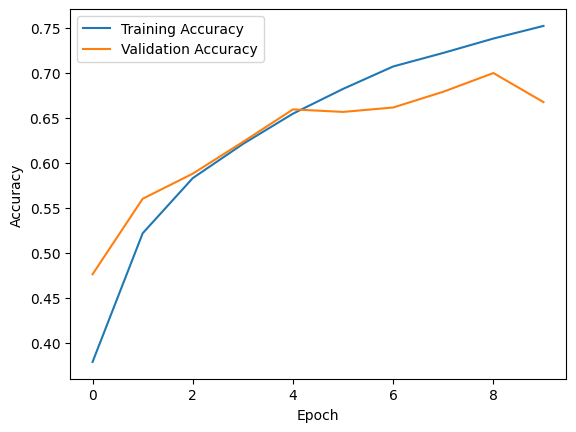

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()